# Analisis desinformacion

Importamos datos y librerias

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import mglearn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
datos = pd.read_csv('datosFinalesCalificados.csv',delimiter=";",decimal=',')
datos.head(10)

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,estrato_gr,ERV_desconfianza,ERV_riesgo,conspiracion,escepticis,busc_importancia,busc_comportamiento,confi_redes,confi_experto,confi_allegado
0,1,1,Ls,20,2,1,1,1,2,4.0,...,2,24.719586,15.248551,67.829252,75.000000,48.668738,20.837907,51.188464,66.633209,75.000000
1,2,2,Angie,21,2,1,1,6,4,4.0,...,2,10.465200,17.207990,56.839841,87.100122,92.381992,90.230516,94.010142,85.962145,75.000000
2,3,3,AJ,21,1,1,1,2,3,4.0,...,2,0.000000,59.919183,72.137657,100.000000,100.000000,100.000000,85.542996,96.745053,8.524436
3,4,4,Isabella Buritica,22,2,1,1,1,4,4.0,...,1,3.037820,0.000000,21.201191,55.757021,78.809004,95.426271,74.450666,85.962145,50.000000
4,5,5,Kelys Avila,20,2,1,1,6,2,4.0,...,2,0.000000,19.167429,7.015222,50.689866,100.000000,100.000000,65.096134,96.745053,50.000000
5,6,6,RP,20,2,4,1,6,1,4.0,...,2,25.000000,76.959439,50.000000,50.000000,79.233160,80.195756,82.548067,71.745053,50.000000
6,7,7,María Cecilia García Bonet,20,2,1,1,6,1,4.0,...,2,0.000000,28.751144,46.700860,75.000000,100.000000,100.000000,75.934925,100.000000,25.000000
7,8,8,Jeiling Turriago Viana,20,2,1,1,6,3,4.0,...,1,3.037820,36.375419,25.205162,75.000000,78.842600,79.724662,82.548067,79.667336,50.000000
8,9,9,Juan Camilo Joya Caro,20,1,2,1,5,4,4.0,...,1,0.000000,0.000000,65.658504,63.137973,84.763985,100.000000,100.000000,100.000000,100.000000
9,10,10,Maria Martin,21,2,1,1,6,1,4.0,...,3,26.136037,38.334858,61.343481,49.426129,100.000000,79.162093,77.049440,61.306280,50.000000


In [3]:
datos.columns.values

array(['Unnamed: 0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27',
       'Q28', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36',
       'Q37', 'Q38', 'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45',
       'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54',
       'Q55', 'Q56', 'Q57', 'Q58', 'Q59', 'Q60', 'Q61', 'Q62', 'Q63',
       'Q64', 'Q65', 'Q66', 'Q67', 'Q68', 'Q69', 'Q70', 'Q71', 'Q72',
       'Q73', 'Q74', 'Q75', 'Q76', 'Q77', 'Q78', 'Q79', 'Q80', 'Q81',
       'Q82', 'Q83', 'Q84', 'Q85', 'Q86', 'Q87', 'Q88', 'Q89', 'Q90',
       'Q91', 'Q92', 'Q93', 'Q94', 'Q95', 'Q96', 'Q97', 'Q98', 'Q99',
       'Q100', 'Q101', 'Q102', 'Q103', 'Q104', 'Q105', 'Q106', 'Q107',
       'Q108', 'Q109', 'Q110', 'Q111', 'Q112', 'Q113', 'Q114', 'Q115',
       'Q116', 'Q117', 'Q118', 'Q119', 'Q120', 'Q121', 'Q122', 'Q123',
       'Q124

# Regresión ridge

Seleccionamos las variables de interés y separamos los datos de entrenamiento y testeo. La desconfianza hacia las vacunas será nuestra variable objetivo

In [4]:
etiq1=['conspiracion','escepticis', 'busc_importancia', 'busc_comportamiento','confi_redes', 'confi_experto', 'confi_allegado']
x_train, x_test, y_train, y_test = train_test_split(datos[etiq1], datos['ERV_desconfianza'], random_state=0)

Ahora escalamos los datos

In [5]:
scaler = MinMaxScaler().fit(x_train)

In [6]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

ridge = Ridge().fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test_scaled, y_test)))

ridge01 = Ridge(alpha=10).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge01.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(x_test_scaled, y_test)))

ridge1 = Ridge(alpha=1).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge1.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge1.score(x_test_scaled, y_test)))

ridge10 = Ridge(alpha=0.1).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge10.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(x_test_scaled, y_test)))

ridge100 = Ridge(alpha=0.01).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge100.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge100.score(x_test_scaled, y_test)))

ridge1000 = Ridge(alpha=0.001).fit(x_train_scaled, y_train)
print("Training set score: {:.2f}".format(ridge1000.score(x_train_scaled, y_train)))
print("Test set score: {:.2f}".format(ridge1000.score(x_test_scaled, y_test)))

Training set score: 0.46
Test set score: 0.47
Training set score: 0.43
Test set score: 0.44
Training set score: 0.46
Test set score: 0.47
Training set score: 0.46
Test set score: 0.47
Training set score: 0.46
Test set score: 0.47
Training set score: 0.46
Test set score: 0.47


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

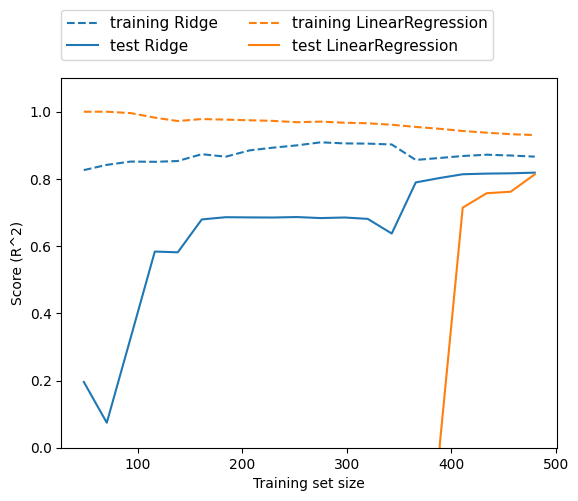

In [7]:
mglearn.plots.plot_ridge_n_samples()

# Support vector machine (SVM)

Para este análisis es necesario segmentar la variable objetivo en grupos.

In [8]:
a=pd.DataFrame(datos.ERV_desconfianza.quantile([0.75]))
x1=datos['ERV_desconfianza']
datos['ERV_cat'] = np.where(x1 <=  a.iloc[0,0], "low", "high")
pd.value_counts(datos['ERV_cat'])

low     558
high    140
Name: ERV_cat, dtype: int64

A continuación dividimos los datos en entrenamiento y testeo

In [9]:
x_train, x_test, y_train, y_test = train_test_split(datos[etiq1], datos['ERV_cat'], stratify= datos['ERV_cat'],random_state=0)
scaler = MinMaxScaler().fit(x_train)

Ejecutamos el modelo de SVM y hacemos validación cruzada con GreadSearch

In [10]:
param_grid = {'svm__C': [1,10,100,1000], 
              'svm__gamma': [0.0001,0.001, 0.01, 0.1,1]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,n_jobs=-1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.84
Test set score: 0.823
Best parameters: {'svm__C': 100, 'svm__gamma': 0.1}


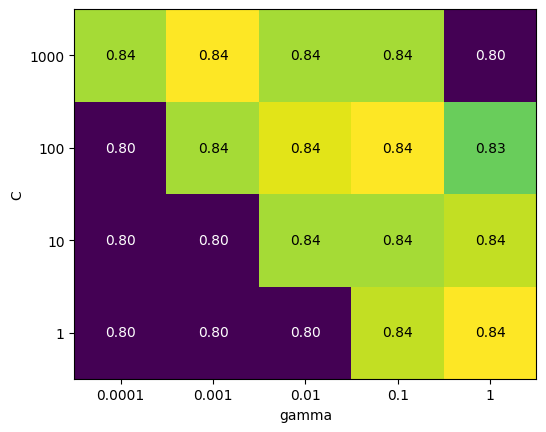

In [11]:
results = pd.DataFrame(grid.cv_results_)
scores = np.array(results.mean_test_score).reshape(4, 5)
mglearn.tools.heatmap(scores, 
                      xlabel='gamma', 
                      xticklabels=param_grid['svm__gamma'], 
                      ylabel='C', 
                      yticklabels=param_grid['svm__C'], 
                      cmap="viridis");

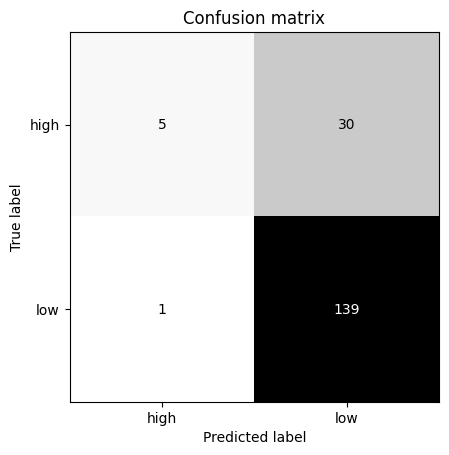

In [12]:
pred=grid.predict(x_test)
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label',
                                     ylabel='True label', 
                                     xticklabels=np.unique(datos.ERV_cat),
                                     yticklabels=np.unique(datos.ERV_cat), 
                                     cmap=plt.cm.gray_r, 
                                     fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [13]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        high       0.83      0.14      0.24        35
         low       0.82      0.99      0.90       140

    accuracy                           0.82       175
   macro avg       0.83      0.57      0.57       175
weighted avg       0.82      0.82      0.77       175



# Random Forest

In [14]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('classifier', RandomForestClassifier())])

param_grid = [{'classifier': [RandomForestClassifier(n_estimators=100)],

               'preprocessing': [None], 'classifier__max_features': [1, 2, 3, 4, 5, 6, 7]}]

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(x_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

print("Test-set score: {:.3f}".format(grid.score(x_test, y_test)))

Best params:
{'classifier': RandomForestClassifier(max_features=1), 'classifier__max_features': 1, 'preprocessing': None}

Best cross-validation score: 0.85
Test-set score: 0.834


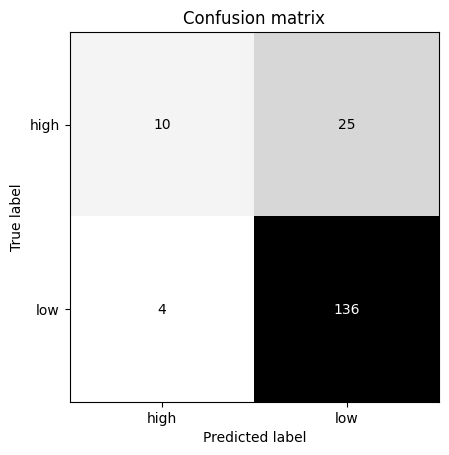

In [15]:
pred=grid.predict(x_test)
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label',
                                     ylabel='True label', 
                                     xticklabels=np.unique(datos.ERV_cat),
                                     yticklabels=np.unique(datos.ERV_cat), 
                                     cmap=plt.cm.gray_r, 
                                     fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        high       0.71      0.29      0.41        35
         low       0.84      0.97      0.90       140

    accuracy                           0.83       175
   macro avg       0.78      0.63      0.66       175
weighted avg       0.82      0.83      0.80       175



# Regresión logística

In [17]:
param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

pipe = Pipeline([("scaler", MinMaxScaler()), ("logisticregression", LogisticRegression())])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs = -1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.84
Test set score: 0.834
Best parameters: {'logisticregression__C': 100}


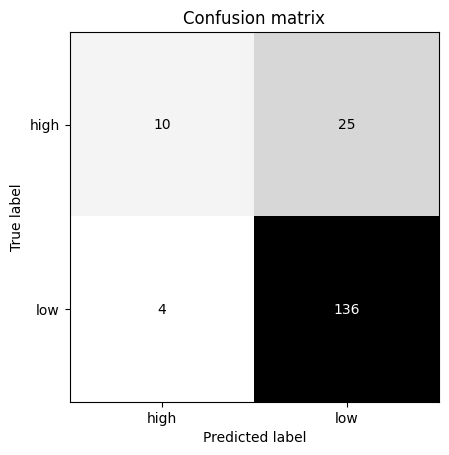

In [18]:
pred=grid.predict(x_test)
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label',
                                     ylabel='True label', 
                                     xticklabels=np.unique(datos.ERV_cat),
                                     yticklabels=np.unique(datos.ERV_cat), 
                                     cmap=plt.cm.gray_r, 
                                     fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        high       0.71      0.29      0.41        35
         low       0.84      0.97      0.90       140

    accuracy                           0.83       175
   macro avg       0.78      0.63      0.66       175
weighted avg       0.82      0.83      0.80       175



# XG Boosting

In [20]:
a=pd.DataFrame(datos.ERV_desconfianza.quantile([0.75]))
x1=datos['ERV_desconfianza']
datos['ERV_cat2'] = np.where(x1 <=  a.iloc[0,0], 0,1)
pd.value_counts(datos['ERV_cat2'])
x_train, x_test, y_train, y_test = train_test_split(datos[etiq1], datos['ERV_cat2'], stratify= datos['ERV_cat2'],random_state=0)
scaler = MinMaxScaler().fit(x_train)

In [21]:
param_grid = {'Gradient_boosting__n_estimators': [10, 20, 30, 40],
              'Gradient_boosting__gamma' : [0.1, 1, 10, 100],
              'Gradient_boosting__eta' : [0.01, 0.1, 1, 10],
              'Gradient_boosting__learning_rate' : [0.1,1,10,100]}

pipe = Pipeline([("scaler", MinMaxScaler()),("Gradient_boosting", xgb.XGBClassifier(objective="binary:logistic",
 booster='gbtree',eval_metric="auc",seed=0))])

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs = -1)
grid.fit(x_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.3f}".format(grid.score(x_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.83
Test set score: 0.811
Best parameters: {'Gradient_boosting__eta': 0.01, 'Gradient_boosting__gamma': 1, 'Gradient_boosting__learning_rate': 0.1, 'Gradient_boosting__n_estimators': 20}


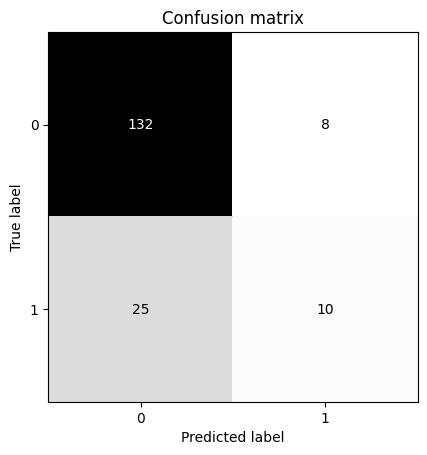

In [22]:
pred=grid.predict(x_test)
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), 
                                     xlabel='Predicted label',
                                     ylabel='True label', 
                                     xticklabels=np.unique(datos.ERV_cat2),
                                     yticklabels=np.unique(datos.ERV_cat2), 
                                     cmap=plt.cm.gray_r, 
                                     fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [23]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       140
           1       0.56      0.29      0.38        35

    accuracy                           0.81       175
   macro avg       0.70      0.61      0.63       175
weighted avg       0.78      0.81      0.79       175



# Analisis de importancia

In [24]:
x_train, x_test, y_train, y_test = train_test_split(datos[etiq1], datos['ERV_cat'], stratify= datos['ERV_cat'],random_state=0)
pipe = Pipeline([('preprocessing', MinMaxScaler()), ('classifier', RandomForestClassifier())])

param_grid = [{'classifier': [RandomForestClassifier(n_estimators=100)],

               'preprocessing': [None], 'classifier__max_features': [1, 2, 3, 4, 5, 6, 7]}]

grid = GridSearchCV(pipe, param_grid, cv=5)

grid.fit(x_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))

print("Best cross-validation score: {:.2f}".format(grid.best_score_))

print("Test-set score: {:.3f}".format(grid.score(x_test, y_test)))

Best params:
{'classifier': RandomForestClassifier(max_features=1), 'classifier__max_features': 1, 'preprocessing': None}

Best cross-validation score: 0.85
Test-set score: 0.834


<AxesSubplot: xlabel='x', ylabel='y'>

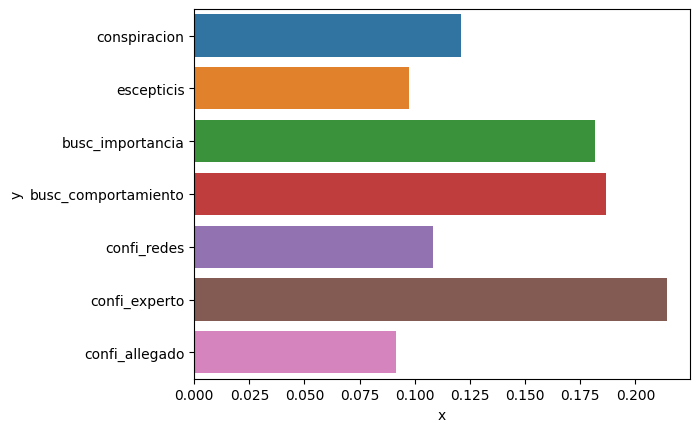

In [27]:
features=grid.best_estimator_.named_steps.classifier.feature_importances_
df={'x':features,'y':datos[etiq1].columns}
df=pd.DataFrame(df)
sns.barplot(data=df, x="x", y="y")